In [1]:
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
df = pd.read_csv('Recursos humanos.csv')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [2]:
# Convertir las columnas categóricas a binarias con dummies
df = pd.concat([df, pd.get_dummies(df['salary'], prefix='salary')], axis=1)
# Eliminando las colunmas de origen 
df = df.drop('salary', axis=1)
df = df.drop('sales', axis=1)

In [3]:
#Convertiendo a tipo enteros las variables salary
df['salary_high'] = df['salary_high'].astype(int)
df['salary_low'] = df['salary_low'].astype(int)
df['salary_medium'] = df['salary_medium'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   salary_high            14999 non-null  int64  
 9   salary_low             14999 non-null  int64  
 10  salary_medium          14999 non-null  int64  
dtypes: float64(2), int64(9)
memory usage: 1.3 MB


In [4]:
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary_high,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,1,0,0,1,0
1,0.80,0.86,5,262,6,0,1,0,0,0,1
2,0.11,0.88,7,272,4,0,1,0,0,0,1
3,0.72,0.87,5,223,5,0,1,0,0,1,0
4,0.37,0.52,2,159,3,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,0,1,0
14995,0.37,0.48,2,160,3,0,1,0,0,1,0
14996,0.37,0.53,2,143,3,0,1,0,0,1,0
14997,0.11,0.96,6,280,4,0,1,0,0,1,0


In [5]:
y = df.left.values
x_df = df.drop(['left'], axis = 1)

In [6]:
y

array([1, 1, 1, ..., 1, 1, 1])

In [7]:
x_df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary_high,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,0,0,1,0
1,0.80,0.86,5,262,6,0,0,0,0,1
2,0.11,0.88,7,272,4,0,0,0,0,1
3,0.72,0.87,5,223,5,0,0,0,1,0
4,0.37,0.52,2,159,3,0,0,0,1,0


In [8]:
# Normalization
x = (x_df - np.min(x_df)) / (np.max(x_df) - np.min(x_df))

In [9]:
# Bases de entrenamiento y de Prueba
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 1)

In [10]:
# Declaracion de modelo de KNN
from sklearn.neighbors import KNeighborsClassifier
res = []
for k in range(1,20):
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(x_train, y_train)
    res.append(knn.score(x_test, y_test))
print(res)

[0.9553333333333334, 0.9533333333333334, 0.9448888888888889, 0.9457777777777778, 0.9397777777777778, 0.9446666666666667, 0.9395555555555556, 0.9406666666666667, 0.9368888888888889, 0.9382222222222222, 0.9355555555555556, 0.9373333333333334, 0.9337777777777778, 0.9364444444444444, 0.9337777777777778, 0.9344444444444444, 0.9322222222222222, 0.9333333333333333, 0.93]


In [11]:
knn_opt = KNeighborsClassifier(n_neighbors = 2)
knn_opt.fit(x_train, y_train)
y_pred = knn_opt.predict(x_test)
y_true = y_test
print('Score:', knn_opt.score(x_test, y_test))

Score: 0.9533333333333334


In [12]:
# Creacion de la matriz de confusion
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, y_pred)
cm

array([[3324,   92],
       [ 118,  966]])

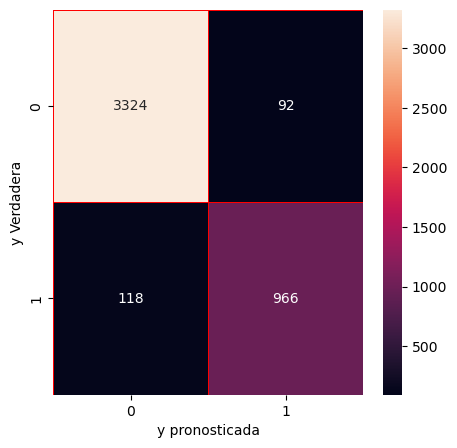

In [13]:
# Mapa de calor de la matrix de confusion
import seaborn as sns
f, ax = plt.subplots(figsize = (5,5))

sns.heatmap(cm, annot = True, linewidths = 0.5, linecolor = 'red', fmt = '.0f', ax = ax)
plt.xlabel('y pronosticada')
plt.ylabel('y Verdadera')
plt.show()

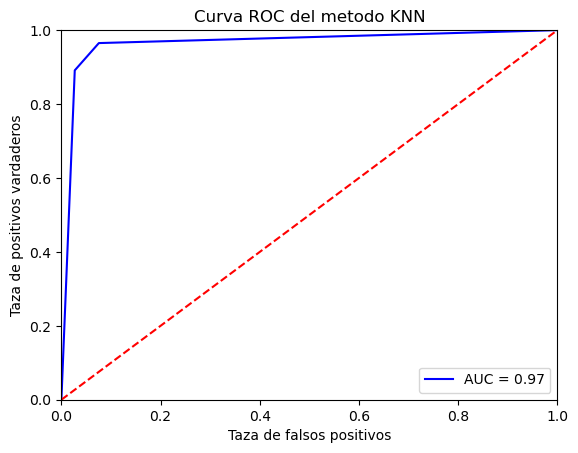

In [14]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

y_scores = knn_opt.predict_proba(x_test)

fpr, tpr, threshold = roc_curve(y_test, y_scores[:,1])
# fpr = False positive rate, tpr = True positive rate
roc_auc = auc(fpr, tpr)

plt.title("Receiver Operating Characteristic")
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel("Taza de positivos vardaderos")
plt.xlabel("Taza de falsos positivos")
plt.title("Curva ROC del metodo KNN")
plt.show()